## Load .csv file

In [26]:
import pandas as pd
filename = 'https://frostlor-cdn-prod.courses.csuglobal.edu/lor/resources/src/d1290f0a-1fd2-384d-83df-710b62725186/MIS542titanic.csv'
titanic_df = pd.read_csv(filename)

In [3]:
titanic_df.head()

,Survived,Passenger Class,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare in British Pounds
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


## What was the average cost in U.S. dollars of a first-class ticket?

In [28]:
first_class = titanic_df['Passenger Class']==1

In [28]:
filter_fares = titanic_df['Fare in British Pounds']>0

In [29]:
df_a = titanic_df.loc[first_class & filter_fares, :]

In [30]:
average_in_pounds = df_a['Fare in British Pounds'].mean()

In [31]:
average_in_dollars = average_in_pounds*1.28

In [32]:
round(average_in_dollars, 2)

110.27

## How many passengers over 20 had siblings onboard?

In [9]:
age_filter = titanic_df['Age']>20

In [11]:
sibling_filter = titanic_df['Siblings/Spouses Aboard']>1

In [12]:
df_b = titanic_df.loc[age_filter & sibling_filter, :]

In [13]:
df_b['Age'].count()

23

## What was the median age of those who did not survive?

In [14]:
died = titanic_df['Survived']==0

In [15]:
df_c = titanic_df.loc[died, :]

In [16]:
median_age = df_c['Age'].median()

In [17]:
median_age

28.0

## How many on the passenger list were male and how many were female?

In [18]:
titanic_df['Sex'].value_counts()

male      573
female    314
Name: Sex, dtype: int64

## What was the total fare in dollars?

In [20]:
fare_sum = titanic_df['Fare in British Pounds'].sum()

In [21]:
fare_sum_dollars = fare_sum * 1.28

In [22]:
round(fare_sum_dollars,2)

36678.28

## How many passengers have the name of Henry?

In [25]:
henry = titanic_df['Name'].str.contains('Henry')

In [26]:
df_d = titanic_df.loc[henry, :]

In [26]:
df_d.head()

,Survived,Passenger Class,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare in British Pounds
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
12,0,3,Mr. William Henry Saundercock,male,20.0,0,0,8.0500
51,1,1,Mrs. Henry Sleeper (Myna Haxtun) Harper,female,49.0,1,0,76.7292
61,0,1,Mr. Henry Birkhardt Harris,male,45.0,1,0,83.4750
158,0,3,Master. Thomas Henry Sage,male,5.0,8,2,69.5500


In [27]:
df_d['Name'].count()

33

## Pie Chart - Number of Males and Females

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

Text(0.5, 1.0, 'Number of Males and Females')

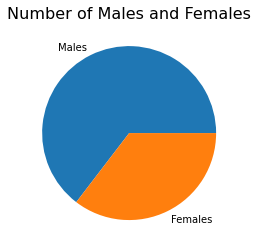

In [6]:
labels_a = ['Males', 'Females']
plt.pie(titanic_df['Sex'].value_counts(), labels = labels_a)
plt.title('Number of Males and Females', fontsize=16)

## Bar Chart - Count of Male Survivors and Female Survivers

In [7]:
survived = titanic_df['Survived']==1

In [8]:
sex = titanic_df['Sex']

In [10]:
plot_a = titanic_df.loc[survived & sex, :].value_counts('Sex')

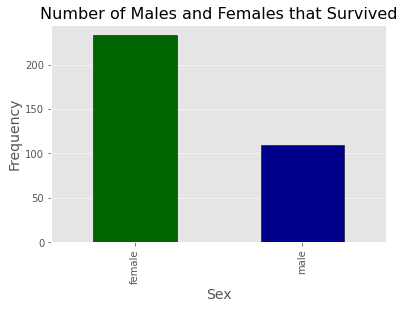

In [17]:
c = ['darkgreen', 'darkblue']
plot_a.plot.bar(edgecolor='black', color=c)
plt.grid(axis='x')
plt.ylabel('Frequency', fontsize=14)
plt.xlabel('Sex', fontsize=14)
plt.title('Number of Males and Females that Survived', fontsize=16)
plt.style.use('ggplot')

## Bar Chart - Count of Each Age

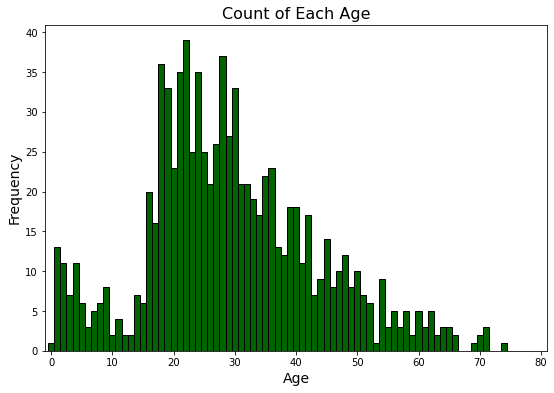

In [23]:
plt.figure(figsize=(9,6))
bins = np.arange(80) - 0.5
plt.hist(titanic_df['Age'], bins=bins, edgecolor='black', color='darkgreen')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xlim(left=-1, right=81)
plt.title('Count of Each Age', fontsize=16)
plt.show()

## Passenger Class Breakdown

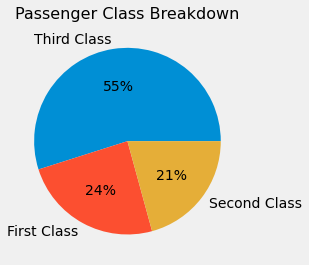

In [10]:
labels = ['Third Class', 'First Class', 'Second Class']
plt.pie(titanic_df['Passenger Class'].value_counts(), labels = labels, autopct='%1.f%%')
plt.title('Passenger Class Breakdown', fontsize=16)
plt.style.use('bmh')

## Age Distribution of First Class Passengers

In [29]:
plot_b = titanic_df.loc[first_class]

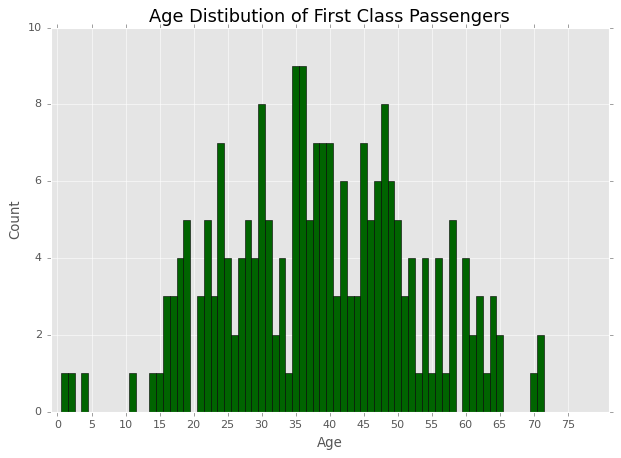

In [42]:
plt.figure(figsize=(9,6))
bins = np.arange(80) - 0.5
plt.hist(plot_b['Age'], bins=bins, edgecolor='black', color='darkgreen')
plt.ylim(0,10)
plt.xlim(-1,81)
plt.xticks(np.arange(0,80,5.0))
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distibution of First Class Passengers', fontsize=16)
plt.show()

## Survival Rates per Passenger Class

In [4]:
one = titanic_df['Passenger Class']==1

In [5]:
onetot = titanic_df.loc[one]

In [6]:
one_total = onetot['Survived'].count()

In [8]:
ones = onetot['Survived']==1

In [9]:
onesur = onetot[ones]

In [10]:
one_survived = onesur['Survived'].count()

In [12]:
two = titanic_df['Passenger Class']==2

In [14]:
twotot = titanic_df.loc[two]

In [15]:
two_total = twotot['Passenger Class'].count()

In [16]:
twos = twotot['Survived']==1

In [17]:
twosur = twotot[twos]

In [18]:
two_survived = twosur['Passenger Class'].count()

In [19]:
three = titanic_df['Passenger Class']==3

In [21]:
threetot = titanic_df.loc[three]

In [22]:
three_total = threetot['Passenger Class'].count()

In [23]:
threes = threetot['Survived']==1

In [24]:
threesur = threetot[threes]

In [25]:
three_survived = threesur['Passenger Class'].count()

In [26]:
first_class_survival_rate = (one_survived/one_total)*100
"{:.2f}".format(first_class_survival_rate)

'62.96'

In [27]:
second_class_survival_rate = (two_survived/two_total)*100
"{:.2f}".format(second_class_survival_rate)

'47.28'

In [28]:
third_class_survival_rate = (three_survived/three_total)*100
"{:.2f}".format(third_class_survival_rate)

'24.44'

Text(0.5, 1.0, 'Survival Rates per Passenger Class')

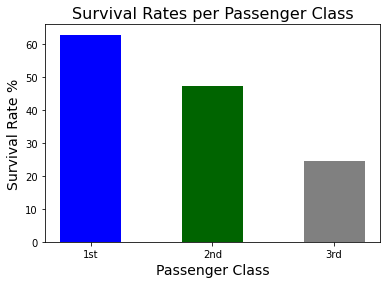

In [29]:
classes = ('1st','2nd','3rd')
values = (first_class_survival_rate, second_class_survival_rate, third_class_survival_rate)
colors = ('blue', 'darkgreen', 'gray')
plt.bar(classes, values, color=colors, width=0.5, linewidth=100)
plt.ylabel('Survival Rate %', fontsize=14)
plt.xlabel('Passenger Class', fontsize=14)
plt.title('Survival Rates per Passenger Class', fontsize=16)